# **MÓDULO 32 - Exercício**
# Random Forest


Nesta tarefa, vocês vão trabalhar com uma base de dados de avaliações de vinhos, onde o objetivo é prever a pontuação dos vinhos usando o algoritmo de Random Forest para classificação multiclasse.

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv("winequality-red.csv", delimiter=',')

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Vamos conhecer nossa base:**

Características dos Vinhos (Features)

Fixed Acidity: Acidez fixa do vinho.

Volatile Acidity: Acidez volátil do vinho.

Citric Acid: Quantidade de ácido cítrico no vinho.

Residual Sugar: Açúcar residual presente no vinho.

Chlorides: Nível de cloretos no vinho.

Free Sulfur Dioxide: Dióxido de enxofre livre no vinho.

Total Sulfur Dioxide: Quantidade total de dióxido de enxofre no vinho.

Density: Densidade do vinho.

pH: Nível de pH do vinho.

Sulphates: Quantidade de sulfatos no vinho.

Alcohol: Teor alcoólico do vinho.



**Variável de Saída (Target):**

Quality: Pontuação do vinho baseada em dados sensoriais, variando de 0 a 10.


Esta abordagem permitirá que vocês explorem como diferentes características químicas influenciam a qualidade dos vinhos e como o Random Forest pode ser usado para fazer previsões precisas com base nesses dados.

# 1 - Realize a primeira etapa de pré processamento dos dados.

A) Verifique os tipos de dados.


B) Verifique os dados faltantes, se houver dados faltantes faça a substituição ou remoção justificando sua escolha.

In [13]:
#seu código aqui

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Não existem dados faltantes no arquivo.

# 2 - Realize a segunda e terceita etapa de pré processamento dos dados.

A) Utilize a função describe para identificarmos outliers e verificarmos a distribuição dos dados.

B) Verifique o balanceamento da váriavel Target.

C)  Plote o gráfico ou a tabela e indique as variáveis que te parecem mais "fortes" na correlação para nosso modelo.

D) Crie um novo dataframe apenas com as váriaveis que parecem ter maior correlação com a target. (Negativa ou positiva)


In [17]:
#seu código aqui
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [18]:
df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

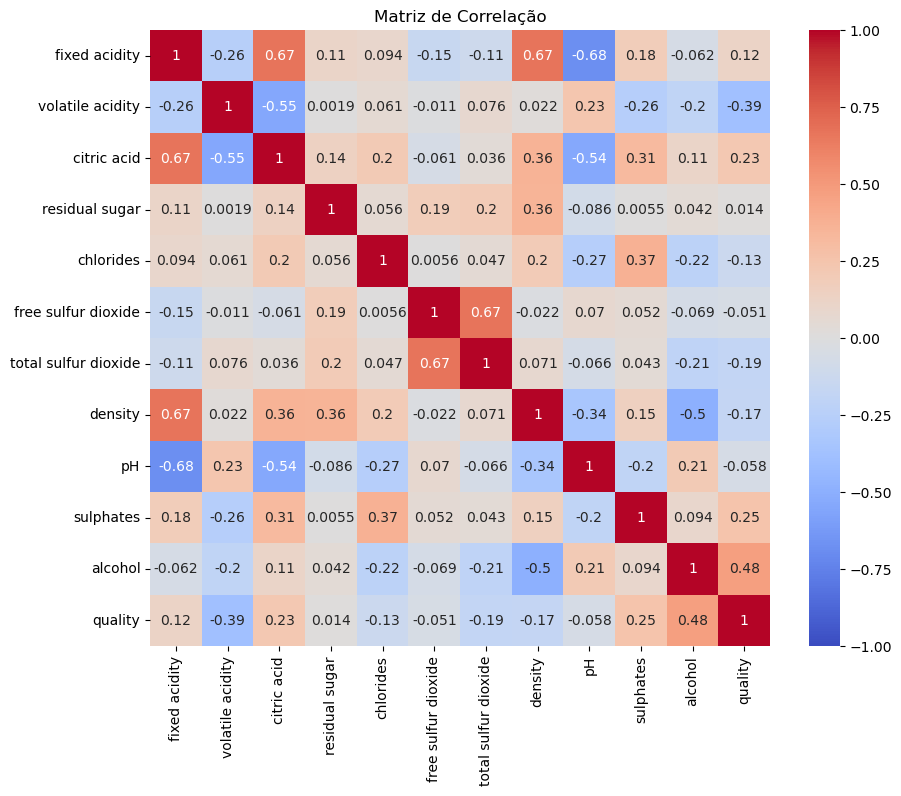

In [19]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

In [20]:
#df_2 = df.copy()
#df_2 = df['alcohol'], df['volatile acidity'], df['sulphates'], df['citric acid']
#df_2.head()

df_2 = df.copy()

df_2 = df[['alcohol', 'volatile acidity', 'sulphates', 'citric acid', 'quality']]
df_2.head()

,alcohol,volatile acidity,sulphates,citric acid,quality
0,9.4,0.70,0.56,0.00,5
1,9.8,0.88,0.68,0.00,5
2,9.8,0.76,0.65,0.04,5
3,9.8,0.28,0.58,0.56,6
4,9.4,0.70,0.56,0.00,5


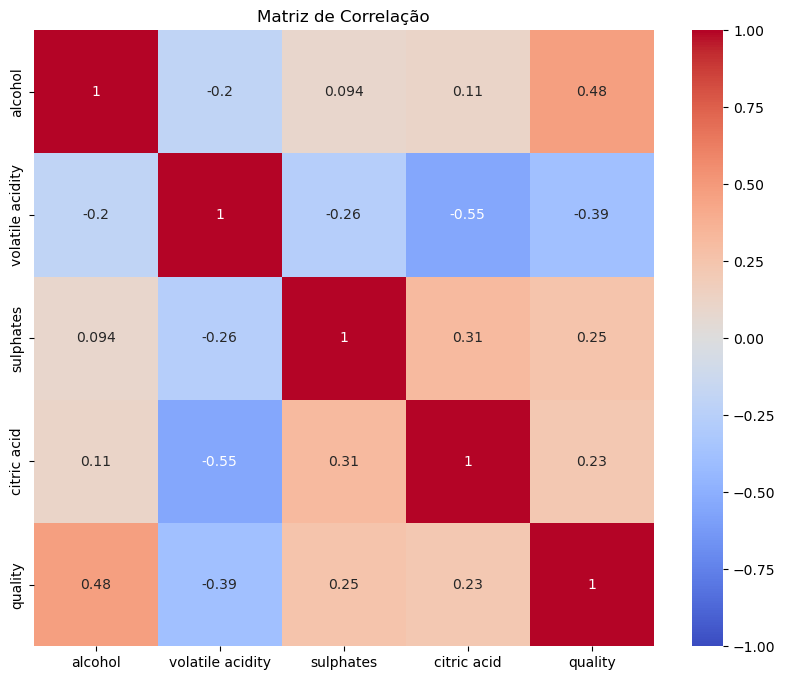

In [21]:
correlation_matrix = df_2.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlação')
plt.show()

# 3 - Preparação Final dos Dados

A) Separe a base em X(Features) e Y(Target)

B) Separe a base em treino e teste.


In [23]:
#seu código aqui
X = df_2.drop('quality', axis=1)
Y = df_2['quality']

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [25]:
smote = SMOTE(random_state=42)
X_train_balanced, Y_train_balanced = smote.fit_resample(X_train, Y_train)

# 4 - Modelagem

A) Inicie e treine o modelo de Random Forest

B) Aplique a base de teste o modelo.


In [33]:
#seu código aqui
rf_model = RandomForestClassifier(random_state=42)

In [34]:
rf_model.fit(X_train_balanced, Y_train_balanced)

RandomForestClassifier(random_state=42)

In [37]:
Y_pred = rf_model.predict(X_test)

# 5 - Avaliação

A) Avalie as principais métricas da Claissificação e traga insights acerca do resultado, interprete os valores achados.

B) Você nota que o modelo teve dificuldade para prever alguma classe? Se sim, acredita que tenha relação com o balanceamento dos dados? Explique.


In [44]:
#seu código aqui
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.59
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.10      0.20      0.13        10
           5       0.73      0.68      0.71       130
           6       0.63      0.55      0.58       132
           7       0.53      0.62      0.57        42
           8       0.11      0.20      0.14         5

    accuracy                           0.59       320
   macro avg       0.35      0.37      0.36       320
weighted avg       0.63      0.59      0.61       320

Matriz de Confusão:
 [[ 0  0  1  0  0  0]
 [ 1  2  4  3  0  0]
 [ 4  7 89 28  1  1]
 [ 0 10 28 72 18  4]
 [ 0  1  0 12 26  3]
 [ 0  0  0  0  4  1]]


Sim, o modelo teve dificuldades de prever as classes que tinham muito menos dados, coisa que o balanceamento de dados teria resolvido, por exemplo, nas classes em que ele mais tinha dados, as previsões existiram em grande quantidade, nas outras, o modelo quase nem previu, quem dirá acertou.

# 5 - Melhorando os Hyperparametros

A) Defina o Grid de parametros que você quer testar

B) Inicie e Treine um novo modelo utilizando o random search.

C) Avalie os resultados do modelo.

D) Você identificou melhorias no modelo após aplicar o random search? Justifique.


ps. Essa parte da atividade demorará um pouco para rodar!

In [50]:
#seu código aqui
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

In [52]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_grid,
                                   n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42, scoring='accuracy')

In [54]:
random_search.fit(X_train, Y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='accuracy', verbose=2)

In [55]:
best_params = random_search.best_params_
print(f"Melhores Hiperparâmetros: {best_params}")

Melhores Hiperparâmetros: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [56]:
best_rf_model = random_search.best_estimator_
best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [57]:
Y_pred = best_rf_model.predict(X_test)

In [58]:
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.62
Relatório de Classificação:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.67      0.73      0.70       130
           6       0.58      0.61      0.59       132
           7       0.55      0.52      0.54        42
           8       0.00      0.00      0.00         5

    accuracy                           0.62       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.58      0.62      0.60       320

Matriz de Confusão:
 [[ 0  0  1  0  0  0]
 [ 0  0  6  4  0  0]
 [ 0  0 95 34  1  0]
 [ 0  0 39 80 13  0]
 [ 0  0  1 19 22  0]
 [ 0  0  0  1  4  0]]


C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dudir\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Não existe nenhuma diferença no modelo depois de aplicar os melhores hiperparâmetros, pois o maior problema do modelo era o balanceamento dos dados, então mesmo com os hiperparâmetros melhorados, a acurácia e outras métricas de avaliação continuam as mesmas.

Agora farei o balanceamento para melhor resultado das previsões.

In [61]:
print("Distribuição das classes antes do balanceamento:")
print(Y.value_counts())

Distribuição das classes antes do balanceamento:
quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


In [62]:
print("\nDistribuição das classes depois do balanceamento:")
print(Y_train_balanced.value_counts())


Distribuição das classes depois do balanceamento:
quality
6    551
5    551
4    551
7    551
8    551
3    551
Name: count, dtype: int64


In [63]:
best_rf_model_balanced = random_search.best_estimator_
best_rf_model_balanced.fit(X_train_balanced, Y_train_balanced)

RandomForestClassifier(min_samples_split=5, n_estimators=200, random_state=42)

In [78]:
Y_pred_balanced = best_rf_model_balanced.predict(X_train_balanced)

In [80]:
accuracy = accuracy_score(Y_train_balanced, Y_pred_balanced)
report = classification_report(Y_train_balanced, Y_pred_balanced)
conf_matrix = confusion_matrix(Y_train_balanced, Y_pred_balanced)

print(f"Acurácia: {accuracy:.2f}")
print("Relatório de Classificação:\n", report)
print("Matriz de Confusão:\n", conf_matrix)

Acurácia: 0.99
Relatório de Classificação:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       551
           4       1.00      1.00      1.00       551
           5       0.98      0.99      0.98       551
           6       1.00      0.97      0.98       551
           7       1.00      1.00      1.00       551
           8       1.00      1.00      1.00       551

    accuracy                           0.99      3306
   macro avg       0.99      0.99      0.99      3306
weighted avg       0.99      0.99      0.99      3306

Matriz de Confusão:
 [[551   0   0   0   0   0]
 [  0 551   0   0   0   0]
 [  0   1 548   2   0   0]
 [  1   0  12 536   2   0]
 [  0   0   2   0 549   0]
 [  0   0   0   0   0 551]]


# 6 - Chegando a perfeição

Baseado em tudo que você já aprendeu até agora, quais outras técnicas você acredita que poderiam ser aplicadas ao modelo para melhorar ainda mais suas previsões?

A técnica de balanceamento dos dados é a que mais ajudaria nosso modelo, que é necessária pela grande diferença nas classes presentes, têm classes que possuem 681 dados e têm classes que possuem apenas 10, ficando de difícil avaliação e previsão.